강의_6기_AI응용_1차시_02_OpenCV 색상의 검출 및 히스토그램.ipynb

## 요약 ##
cv2.cvtColor(이미지, 변형옵션 cv2.COLOR_BGR2RFGB)

cv2.calcHist([이미지], [채널], 마스크, [bins], [픽셀 범위])

hist[x, y]

mask

mask = cv2inRange(image, low_range, high_range)

bitwise_and(image, imgae, mask=mask)

1. 색상에 대해 '히스토그램' 그리기
2. 색상에 대해 '마스크' 그리기

In [25]:
!pip install opencv-python

In [26]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [27]:
image_path = '/content/drive/MyDrive/강의_4차_AI_Computer_Vision_응용_251120/강의_6기_AI응용_1차시_OpenCV 영상정규화 및  Object Detecion 입문/wafer.jpg'

array([[[162, 162, 162],
        [126, 126, 126],
        [134, 134, 134],
        ...,
        [115, 115, 115],
        [110, 110, 110],
        [162, 162, 162]],

       [[139, 139, 139],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [  0,   0,   0],
        [ 12,  12,  12],
        [106, 106, 106]],

       [[120, 120, 120],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [  0,   0,   0],
        [  5,   5,   5],
        [112, 112, 112]],

       ...,

       [[117, 117, 117],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [114, 114, 114]],

       [[108, 108, 108],
        [ 11,  11,  11],
        [  2,   2,   2],
        ...,
        [  1,   1,   1],
        [  6,   6,   6],
        [109, 109, 109]],

       [[158, 158, 158],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [161, 161, 161]]], dtype=uint8)
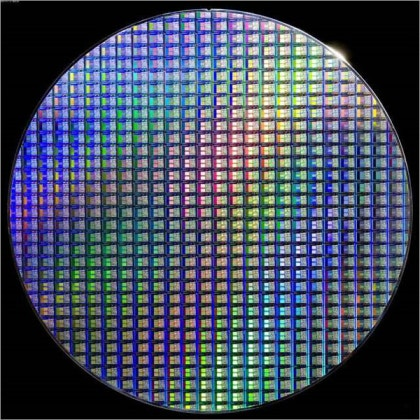

In [28]:
image = cv2.imread(image_path)
src = image.copy()
cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

array([[162, 126, 134, ..., 115, 110, 162],
       [139,  75,  74, ...,   0,  12, 106],
       [120,  22,  21, ...,   0,   5, 112],
       ...,
       [117,   0,   0, ...,   1,   1, 114],
       [108,  11,   2, ...,   1,   6, 109],
       [158, 109, 106, ..., 114, 108, 161]], dtype=uint8)
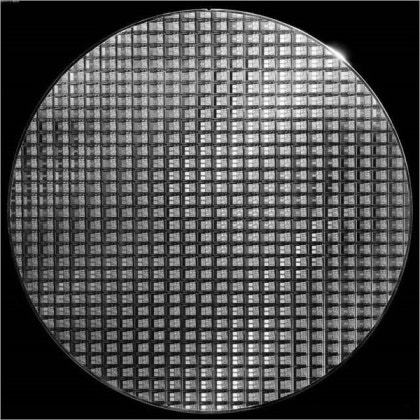

In [29]:
cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

히스토그램(밝기, 개수)

pt1 = (x, 100)

세로축(y축) : 픽셀의 개수
- 컴퓨터의 y축은 반전
- 높이 100 -> 디지털에서 사람의 0

가로축(x축) : 픽셀 밝기 값 위치
- x = 0 -> 모니터 좌하단
- x = 50 -> 모니터 하단 중앙
- x = 100 -> 모니터 우하단

일반적으로
- x = 0 -> 가장 어두운 픽셀
- x = 128 -> 중간 밝기
- x = 255 -> 가장 밝은 픽셀

In [30]:
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) # gray-scale 회색

# cv2.calcHist() 히스토그램 계산함수
# cv2.calcHist([이미지], [채널], 마스크, [bins], [픽셀 범위])
# bins : 계급구간
hist = cv2.calcHist([src],[0], None, [256], [0, 256])

# hist[밝기값, 픽셀 수] -> 어느 픽셀이 제일 많은가(최대값 카운트)
# 행렬로 표현(np)했을 때, 첫 번째 값
hist[0, 0]

np.float32(12408.0)

In [31]:
# 'channels'는 분석할 채널 (예: 그레이스케일에서는 [0])을 지정,
# 'histSize'는 히스토그램 구간의 수 (0~255로 256개 구간),
# 'histRange'는 픽셀 값 범위 (0~255)를 지정합니다.

# x좌표 (픽셀 값 범위 0-255)
# 파이썬은 끝자리 미포함
hist_size = [256]
hist_range = [0, 256]

# opencv 활용
hist = cv2.calcHist([src], [0], None, hist_size, hist_range)

In [32]:
# histMax 기준으로 모든 그래프 그림
hist_max = np.max(hist)
hist_max

# 최대값 대비 비율 (0-1 사이)
# x = 밝기값
# hist[x, 0] * 100 / hist_max

# 실수에서 정수변환 -> 좌표계산
# int(hist[x, 0] * 100 / hist_max)

# y좌표 계산 (아래에서 위)

np.float32(26173.0)

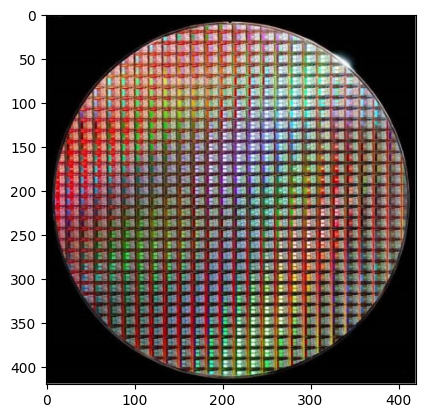

In [33]:
# 그래프 그릴 도화지 준비
image_background = np.full((100, 256), 255, dtype=np.uint8)

# hist[x, 100]
for x in range(256):
    # 시작점
    pt1 = (x, 100)
    # 끝점
    pt2 = (x, 100-int(hist[x, 0] * 100 / hist_max))

plt.imshow(image)

마스크(색상 마스크)

array([[[  0,   0, 162],
        [  0,   0, 126],
        [  0,   0, 134],
        ...,
        [  0,   0, 115],
        [  0,   0, 110],
        [  0,   0, 162]],

       [[  0,   0, 139],
        [  0,   0,  75],
        [  0,   0,  74],
        ...,
        [  0,   0,   0],
        [  0,   0,  12],
        [  0,   0, 106]],

       [[  0,   0, 120],
        [  0,   0,  22],
        [  0,   0,  21],
        ...,
        [  0,   0,   0],
        [  0,   0,   5],
        [  0,   0, 112]],

       ...,

       [[  0,   0, 117],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0, 114]],

       [[  0,   0, 108],
        [  0,   0,  11],
        [  0,   0,   2],
        ...,
        [  0,   0,   1],
        [  0,   0,   6],
        [  0,   0, 109]],

       [[  0,   0, 158],
        [  0,   0, 109],
        [  0,   0, 106],
        ...,
        [  0,   0, 114],
        [  0,   0, 108],
        [  0,   0, 161]]], dtype=uint8)
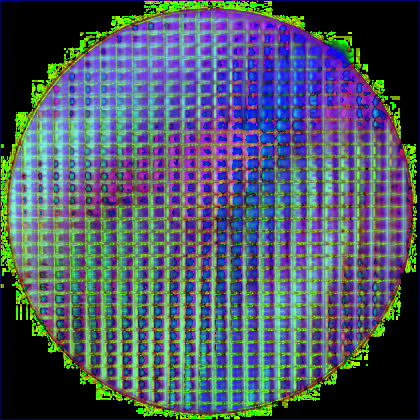

In [34]:
# 색공간 (HSV)

image = cv2.imread(image_path)
cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

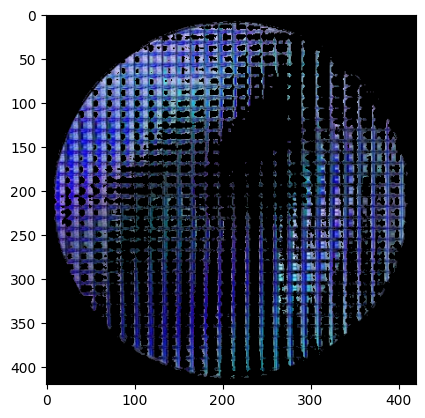

In [35]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV(Hue, Saturation, Value)

# 파란색만 추출
lower_blue = np.array([90, 50, 50])
high_blue = np.array([130, 255, 255])

# 마스크 추출
# low-high 사이에 있는 값은 흰색, 검은색
mask = cv2.inRange(hsv, lower_blue, high_blue)

# AND 연산
# (mask) 해당하는 흰색 부분만 남기고 싶어요
# (mask) 밖에 있는 부분(검은색) >> 검은색
dst = cv2.bitwise_and(image, image, mask=mask)

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
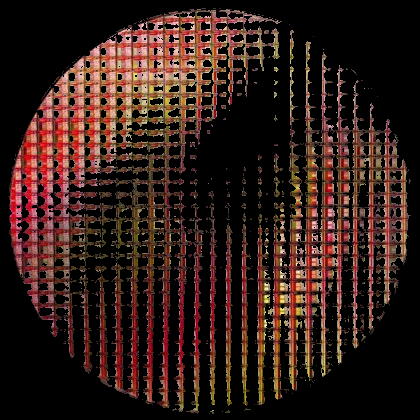

In [36]:
mask = cv2.inRange(hsv, lower_blue, high_blue)
cv2.bitwise_and(image, image, mask=mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
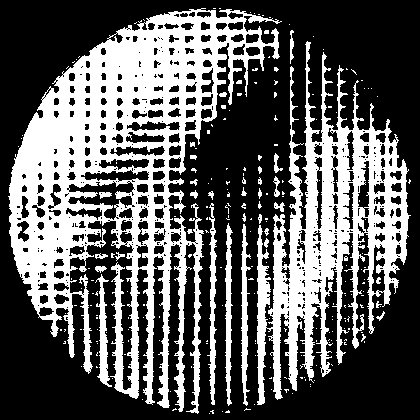

In [37]:
cv2.inRange(hsv, lower_blue, high_blue)